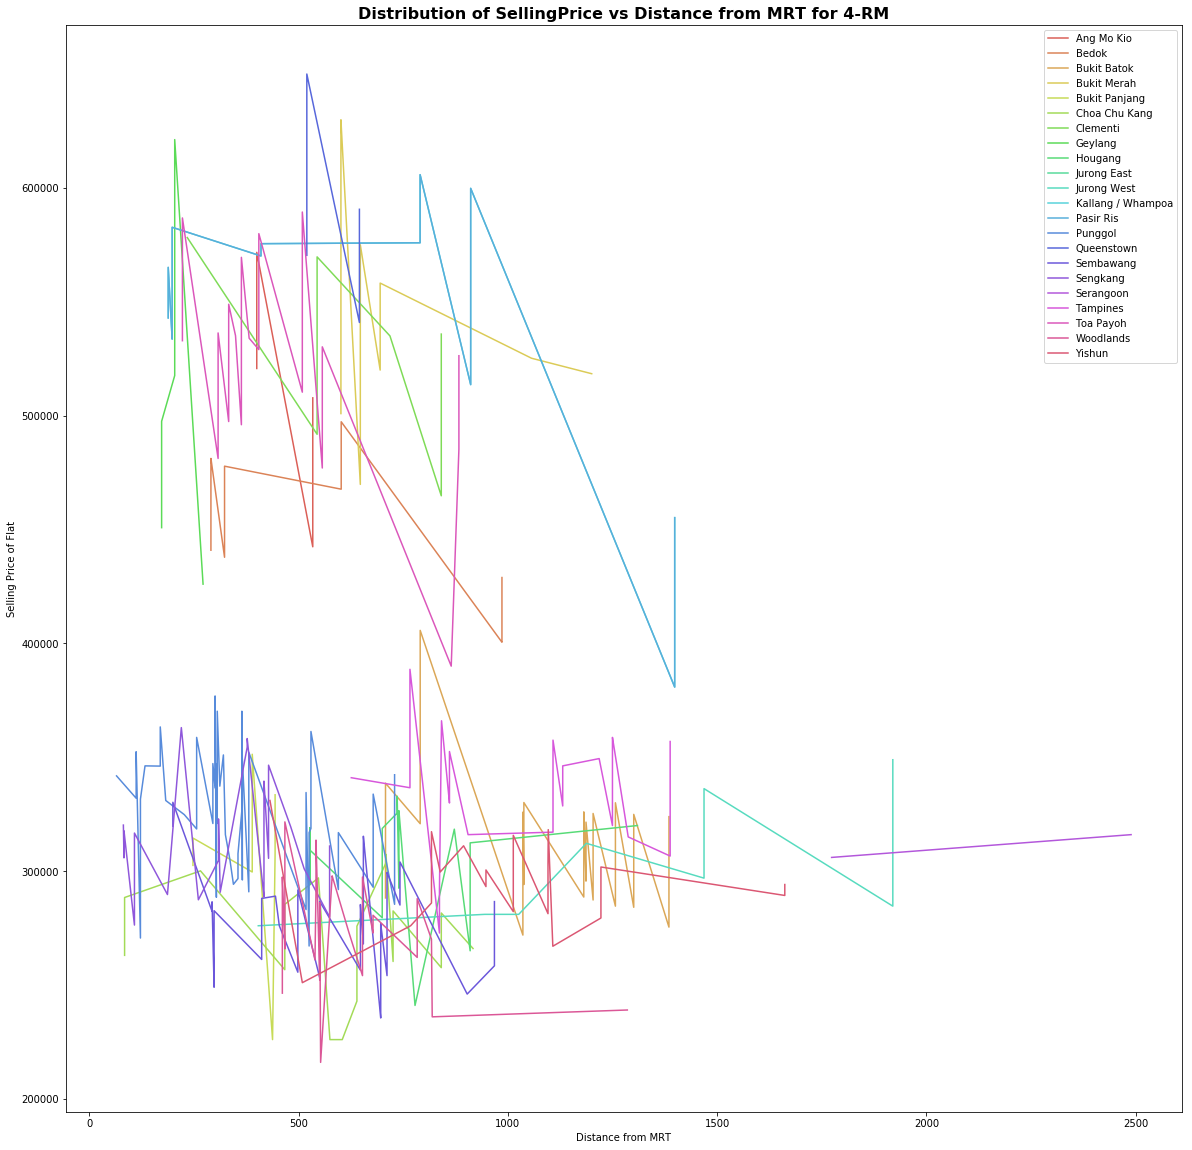

Correlation coefficient for Ang Mo Kio : -0.8798666507832258
Correlation coefficient for Bedok : -0.7764074350685463
Correlation coefficient for Bukit Batok : -0.49308146321575386
Correlation coefficient for Bukit Merah : -0.2656866841259603
Correlation coefficient for Bukit Panjang : -0.1446293486631383
Correlation coefficient for Choa Chu Kang : -0.06239787661102704
Correlation coefficient for Clementi : -0.6066520266555758
Correlation coefficient for Geylang : 0.15640093645462952
Correlation coefficient for Hougang : -0.0659455148591546
Correlation coefficient for Jurong East : nan


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Correlation coefficient for Jurong West : 0.48093220630782135
Correlation coefficient for Kallang / Whampoa : -0.5041557633583333
Correlation coefficient for Pasir Ris : nan
Correlation coefficient for Punggol : -0.37310366714701637
Correlation coefficient for Queenstown : -0.6234374993983576
Correlation coefficient for Sembawang : -0.23433004935731697
Correlation coefficient for Sengkang : -0.0075138025857215286
Correlation coefficient for Serangoon : 1.0
Correlation coefficient for Tampines : -0.4992132539066385
Correlation coefficient for Toa Payoh : -0.11669857453503518
Correlation coefficient for Woodlands : -0.3462144179293891
Correlation coefficient for Yishun : -0.08711445129815193


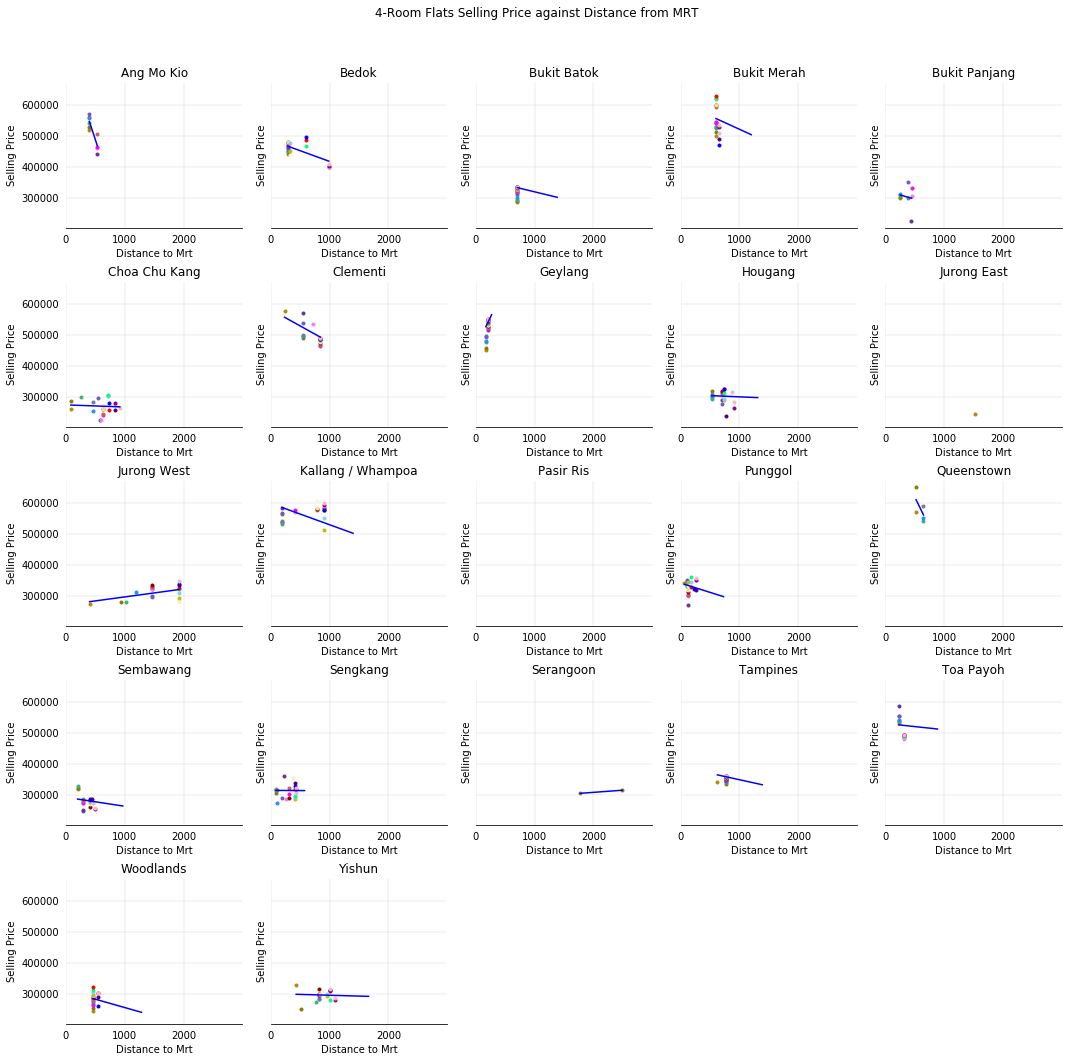

In [6]:
#4 room Scatter plots with repurchase and leasedate no restriction


%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import parseUnitDetails



# 4-Rooms for Nov 2018 Sale of balance flats

# import csv files containing Nov 2018 SBF details
unitDetails = parseUnitDetails.getUnitDetails()

labels = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']
# defining names
DistToMrt= unitDetails['DistToMrt']
town = unitDetails['town']
rmType= unitDetails['rmType']
sellingPrice=unitDetails['sellingPrice']

townToMrt= zip(town,DistToMrt)
townToMrt =set(townToMrt)


##############################################

# Gathering data for town, distance and price
distPrice=list(zip(town,rmType,DistToMrt,sellingPrice))

fig = plt.gcf()
for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== town and name[1]=='4-Room':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])
    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
    

        
# Formatting the graph
    fig.set_size_inches(20, 20)
    #mpl.rcParams['axes.color_cycle'] = ['darkgoldenrod','olive',

    #'thistle','darkmagenta','lightpink']
    #adding colour to the lines in one go
    
    
    sns.set_palette(sns.color_palette("hls", 22)) #just to set colour palette 
                                                    #using seaborn. Not to draw graph
   
    
    plt.plot(dist_town_sorted,price_town_sorted, label=town)
    # Add legend
    plt.legend(loc='upper right')
    # Add title and x, y labels
    plt.title("Distribution of SellingPrice vs Distance from MRT for 4-RM", fontsize=16, fontweight='bold')

    plt.xlabel("Distance from MRT")
    plt.ylabel("Selling Price of Flat")
plt.show()

# make subplots from my above plots
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

# plotting the subplots
colorList= ['darkgoldenrod','olive',
                                   'mediumseagreen','dodgerblue',
                                  'slategrey','slateblue',
                                   'rebeccapurple','violet','fuchsia',
                                    'indianred','darkred','khaki','beige','y',
                                    'lightskyblue','springgreen','red','b','indigo',
                                    'thistle','darkmagenta','lightpink']

for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== town and name[1]=='4-Room':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])

    
    # filter out towns that dont meet search criteria
    # to sort by dist
    dist_town_sorted = []
    price_town_sorted = []
    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
        
        
    # trying to generate correlation coeffient for each subgraph   
    np.random.seed(1)
    x = dist_town_sorted
    y = price_town_sorted
    coeff = np.corrcoef(x, y)
    print("Correlation coefficient for {} : {}".format(town, coeff[0,1]))
    

    ax = axes_list.pop(0)
    # make color
    color = list(zip(dist_town_sorted, price_town_sorted,colorList))
    for dist,price,chooseColor in color:
        ax.plot(dist,price,".",clip_on=False, color=chooseColor)

    ax.set_title(town)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    ax.grid(linewidth=0.25)
    #ax.set_xlim((1950, 2020))
    ax.set_xticks(range(0,2800, 1000))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linewidth=0.25)
    ax.set_xlim((0,3000))
    ax.set_xlabel("Distance to Mrt")
    ax.set_ylabel("Selling Price")
    fig.suptitle('4-Room Flats Selling Price against Distance from MRT')
    
    # Best fit line
    x = dist_town_sorted
    y = price_town_sorted 
    def best_fit_slope_and_intercept(x,y):
        m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) /
             ((np.mean(x)*np.mean(x)) - np.mean(x*x)))
        b = np.mean(y) - m*np.mean(x)

        return m, b

    if len(x) > 1 :
        m, b = best_fit_slope_and_intercept(x,y)
        regression_line = [(m*x_bar)+b for x_bar in x]
        #style.use('ggplot')
        ax.plot(x, regression_line, color='blue') # specific to each subplot
    
for ax in axes_list:
        ax.remove()


plt.tight_layout()  
fig.subplots_adjust(top=0.91)
plt.show()    
print()
    
        



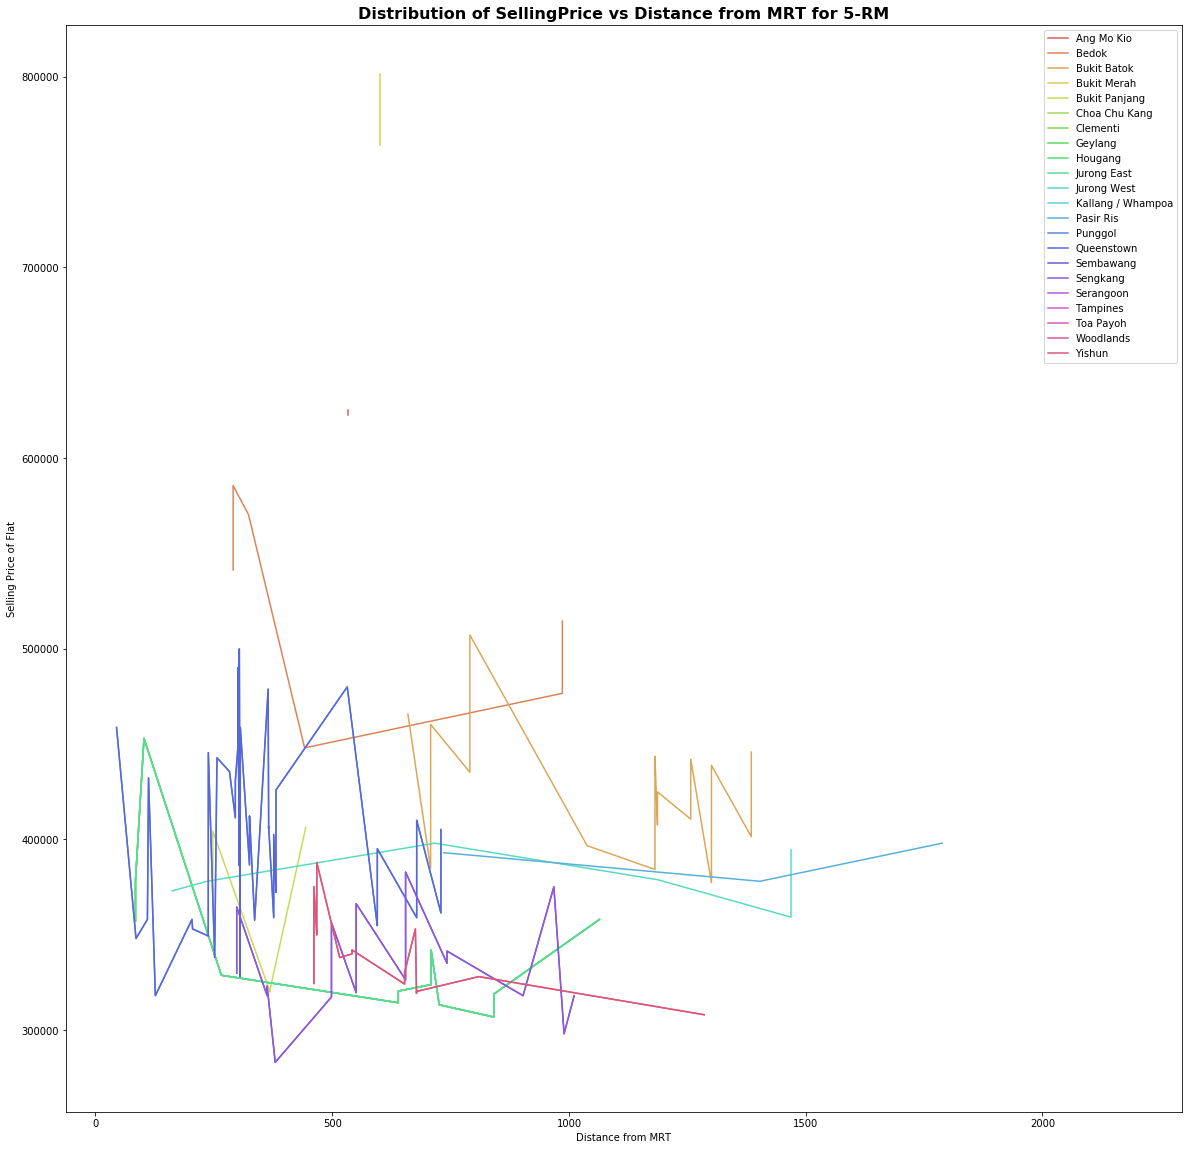

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:148: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: RuntimeWarning: invalid value encountered in double_scalars


Correlation coefficient for Ang Mo Kio : nan
Correlation coefficient for Bedok : -0.6296674364548641
Correlation coefficient for Bukit Batok : -0.42489704702935355
Correlation coefficient for Bukit Merah : nan
Correlation coefficient for Bukit Panjang : -0.1698216369051825
Correlation coefficient for Choa Chu Kang : -0.6224612835685998
Correlation coefficient for Clementi : nan
Correlation coefficient for Geylang : nan
Correlation coefficient for Hougang : nan
Correlation coefficient for Jurong East : nan
Correlation coefficient for Jurong West : -0.16694223424901355
Correlation coefficient for Kallang / Whampoa : nan
Correlation coefficient for Pasir Ris : 0.08889073164388493
Correlation coefficient for Punggol : -0.1719551379450728


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Correlation coefficient for Queenstown : nan
Correlation coefficient for Sembawang : -0.03326189936170284
Correlation coefficient for Sengkang : nan
Correlation coefficient for Serangoon : nan
Correlation coefficient for Tampines : nan
Correlation coefficient for Toa Payoh : nan
Correlation coefficient for Woodlands : -0.6221722160258604
Correlation coefficient for Yishun : nan


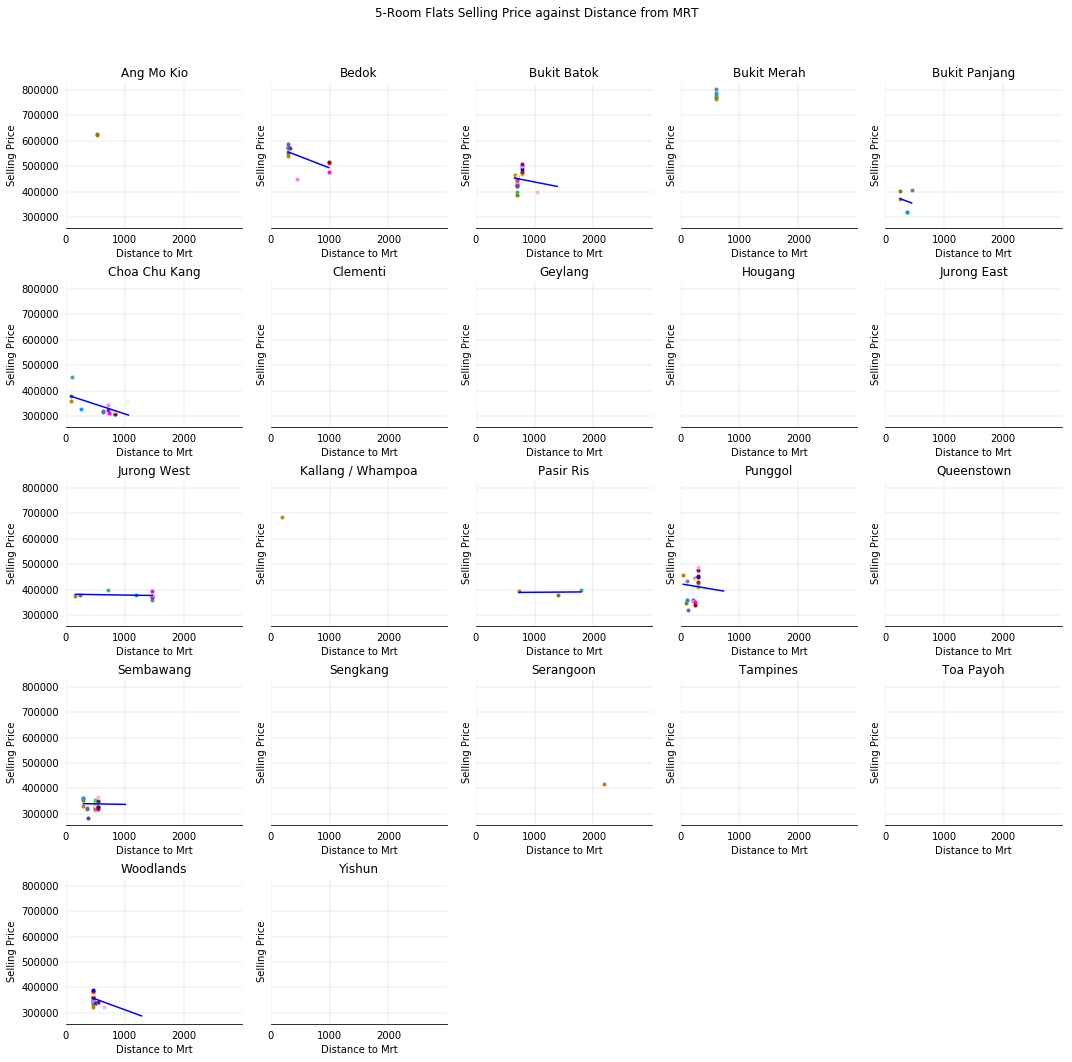

In [4]:
#5 room Scatter plots with repurchase and leasedate no restriction


%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import parseUnitDetails


# TO get a boxplot to see the number of 4-Rooms and number of 5-Room flats available for Nov 2018 Sale of balance flats


# import csv containing Nov 2018 SBF data
unitDetails = parseUnitDetails.getUnitDetails()

# all the 22 towns involved in the SBF Nov 2018
labels = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']
# defining names
DistToMrt= unitDetails['DistToMrt']
town = unitDetails['town']
rmType= unitDetails['rmType']
sellingPrice=unitDetails['sellingPrice']
#print(town)
#print(DistToMrt)
townToMrt= zip(town,DistToMrt)
townToMrt =set(townToMrt)


##############################################

# Gathering data for town, distance and price
distPrice=list(zip(town,rmType,DistToMrt,sellingPrice))
#print('distPrice', distPrice)
#distPrice=set(distPrice)
fig = plt.gcf()
for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== town and name[1]=='5-Room':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])
    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
    
    
        #print('price_town_sorted', price_town_sorted)
        #print('dist_town_sorted', dist_town_sorted)
        
    # Formatting the graph
    fig.set_size_inches(20, 20)
 
    #To colour code the towns for the line graph
    sns.set_palette(sns.color_palette("hls", 22)) #just to set colour palette using seaborn
    
    plt.plot(dist_town_sorted,price_town_sorted, label=town)
    # Add legend
    plt.legend(loc='upper right')
    # Add title and x, y labels
    plt.title("Distribution of SellingPrice vs Distance from MRT for 5-RM", fontsize=16, fontweight='bold')

    plt.xlabel("Distance from MRT")
    plt.ylabel("Selling Price of Flat")
plt.show()

# make subplots from my above plots
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== town and name[1]=='5-Room':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])
    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    dist_town_sorted = []
    price_town_sorted = []
    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
        
        
    # trying to generate correlation coeffient for each subgraph   
    np.random.seed(1)
    x = dist_town_sorted
    y = price_town_sorted
    coeff = np.corrcoef(x, y)
    print("Correlation coefficient for {} : {}".format(town, coeff[0,1]))
    

    ax = axes_list.pop(0)
    # make color
    color = list(zip(dist_town_sorted, price_town_sorted,colorList))
    for dist,price,chooseColor in color:
        ax.plot(dist,price,".",clip_on=False, color=chooseColor)
        
    
    #ax.plot(dist_town_sorted, price_town_sorted ,'.',clip_on=False)
    #ax.plot([0,1,2] )
    ax.set_title(town)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    ax.grid(linewidth=0.25)
    #ax.set_xlim((1950, 2020))
    ax.set_xticks(range(0,2800, 1000))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linewidth=0.25)
    ax.set_xlim((0,3000))
    ax.set_xlabel("Distance to Mrt")
    ax.set_ylabel("Selling Price")
    fig.suptitle('5-Room Flats Selling Price against Distance from MRT')
    
    # Best fit line
    x = dist_town_sorted
    y = price_town_sorted 
    def best_fit_slope_and_intercept(x,y):
        m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) /
             ((np.mean(x)*np.mean(x)) - np.mean(x*x)))
        b = np.mean(y) - m*np.mean(x)

        return m, b

    if len(x) > 1 :
        m, b = best_fit_slope_and_intercept(x,y)
        regression_line = [(m*x_bar)+b for x_bar in x]
        #style.use('ggplot')
        ax.plot(x, regression_line, color='blue') # specific to each subplot
    
for ax in axes_list:
        ax.remove()
plt.tight_layout()  
fig.subplots_adjust(top=0.91)
plt.show()    
print()
    
        


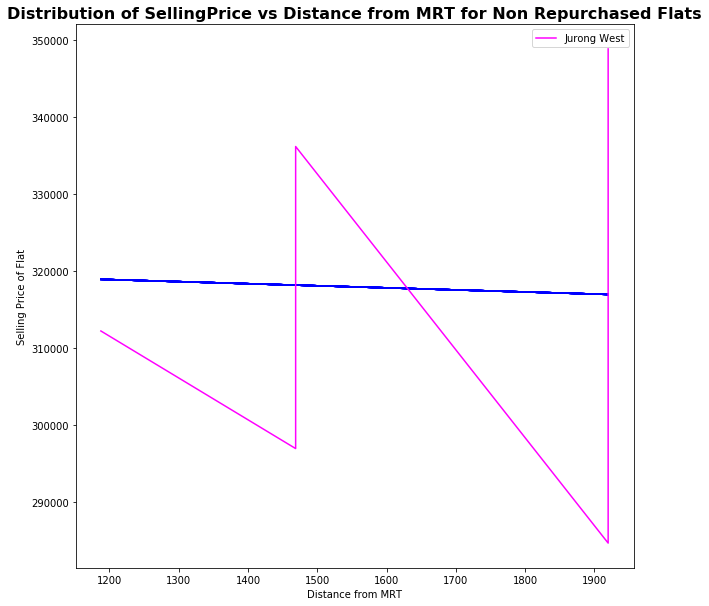

In [5]:
# Explain why Serangoon and Jurong West trend is unexpected in the 4-ROOM FLATS
## Serangoon is because there are only 2 data points so a regression not be useful

## Remove Repurchased flats that are very old from Jurong West
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import parseUnitDetails


# TO get a boxplot to see the number of 4-Rooms and number of 5-Room flats available for Nov 2018 Sale of balance flats
# import the csv files containing Nov 18 SBF data
unitDetails = parseUnitDetails.getUnitDetails()
labels = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']
# defining names
DistToMrt= unitDetails['DistToMrt']
town = unitDetails['town']
rmType= unitDetails['rmType']
sellingPrice=unitDetails['sellingPrice']
repurchased = unitDetails['repurchasedFlat']

#print(town)
#print(DistToMrt)
townToMrt= zip(town,DistToMrt)
townToMrt =set(townToMrt)

####################
# Gathering data for town, distance and price
distPrice=list(zip(town,rmType,DistToMrt,sellingPrice,repurchased))
#print('distPrice', distPrice)
#distPrice=set(distPrice)
fig = plt.gcf()
for town in labels: 
    dist_town=[]
    price_town = []
    for name in distPrice:
        if name[0]== 'Jurong West' and name[1]=='4-Room' and name[4]=='':
            dist_town.append(name[2])  # not that townToMrt is not a array
            price_town.append(name[3])
    #print("dist_{}= ({},{}) ".format(town,dist_town,price_town))
    
    # filter out towns that dont meet search criteria
    # to sort by dist
    if len(dist_town) > 0:
        tmp = list(zip(dist_town, price_town)) # zip dist and price together, so when sorting, they stay together
        tmp.sort() 
        tmpArray = np.array(tmp)
    
        dist_town_sorted = tmpArray[:,0]
        price_town_sorted = tmpArray[:,1]
    
## Regression line
    # Best fit line
    x = dist_town_sorted
    y = price_town_sorted 
    def best_fit_slope_and_intercept(x,y):
        m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) /
             ((np.mean(x)*np.mean(x)) - np.mean(x*x)))
        b = np.mean(y) - m*np.mean(x)

        return m, b

    if len(x) > 1 :
        m, b = best_fit_slope_and_intercept(x,y)
        regression_line = [(m*x_bar)+b for x_bar in x]
        #style.use('ggplot')
        plt.plot(x, regression_line, color='blue') # specific to each subplot
        
# Formatting the graph
fig.set_size_inches(10, 10)


plt.plot(dist_town_sorted,price_town_sorted, label="Jurong West",color= 'Magenta')
# Add legend

# Add title and x, y labels
plt.title("Distribution of SellingPrice vs Distance from MRT for Non Repurchased Flats", fontsize=16, fontweight='bold')

plt.xlabel("Distance from MRT")
plt.ylabel("Selling Price of Flat")
plt.legend(loc='upper right')
plt.show()

### The resale flats are cheaper in general due to the age of the flats which are if older. We would like to explore that in the next plot
